<a href="https://colab.research.google.com/github/tocom242242/aifx_blog_codes/blob/master/anomaly_detection/simple_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.svm import OneClassSVM

In [31]:
X, Y = datasets.make_blobs(n_samples=200, centers=2, n_features=2,random_state=0)
print(Y.shape)
print(X.shape)

(200,)
(200, 2)


In [32]:
# X,Y = datasets.make_classification(n_samples=200,n_features=2,n_redundant=0)
# print(Y.shape)
# print(X.shape)

In [33]:
int(False)

0

In [34]:
normal = 1
abnormal = 0

In [35]:
# x_train = X[np.where(Y==1,True,False)]
# y_train = Y[np.where(Y==1,True,False)]
# x_test = X[np.where(Y==0,True,False)]

x_normal = X[np.where(Y==normal,True,False)]
y_normal = Y[np.where(Y==normal,True,False)]

x_abnormal = X[np.where(Y==abnormal,True,False)]
y_abnormal = Y[np.where(Y==abnormal,True,False)]

(-3.0, 7.0)

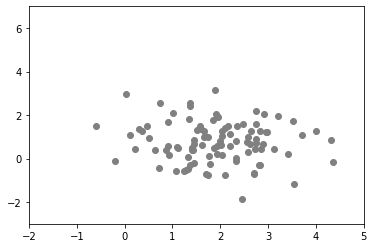

In [36]:
plt.scatter(x_normal[:, 0], x_normal[:, 1], c='grey')
plt.xlim(-2,5)
plt.ylim(-3,7)

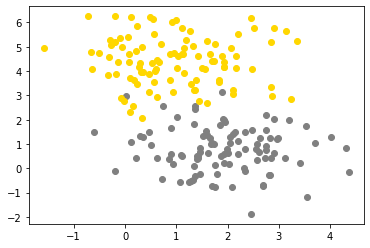

In [37]:
# plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm.seismic)
plt.scatter(x_normal[:, 0], x_normal[:, 1], c="grey")
plt.scatter(x_abnormal[:, 0], x_abnormal[:, 1], c="gold")

In [38]:
svm = OneClassSVM(kernel='rbf', nu=0.2, gamma=1e-04)
svm.fit(x_normal)


y_pred = svm.predict(X)

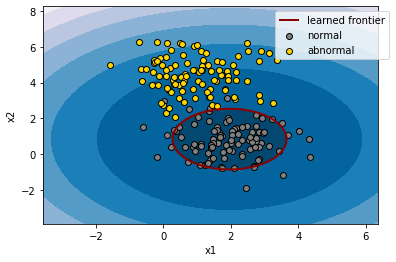

In [39]:
x1_min, x1_max = X[:, 0].min() - 2, X[:, 0].max() + 2
x2_min, x2_max = X[:, 1].min() - 2, X[:, 1].max() + 2

x1_ = np.linspace(x1_min, x1_max, 500)
x2_ = np.linspace(x2_min, x2_max, 500)

xx1, xx2 = np.meshgrid(x1_, x2_)

z = svm.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)

plt.contourf(xx1, xx2, z, cmap=plt.cm.PuBu)
a = plt.contour(xx1, xx2, z, levels=[0], linewidths=2, colors='darkred')
b = plt.scatter(X[Y == normal, 0], X[Y == normal, 1], c='grey', edgecolors='k')
c = plt.scatter(X[Y == abnormal, 0], X[Y == abnormal, 1], c='gold', edgecolors='k')
plt.legend([a.collections[0], b, c], ['learned frontier', 'normal', 'abnormal'], bbox_to_anchor=(1.05, 1))
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('tight')
plt.show()

In [40]:
# np.place(Y, Y==0,-1)
np.place(y_pred, y_pred==-1,0)

In [41]:
confusion_matrix(Y, y_pred)

array([[100,   0],
       [ 19,  81]])

In [42]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       100
           1       1.00      0.81      0.90       100

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.90       200
weighted avg       0.92      0.91      0.90       200



auc: 0.9901


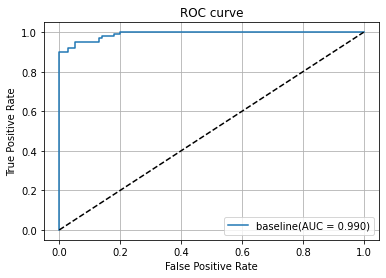

In [43]:
y_score = svm.decision_function(X)
auc = roc_auc_score(Y,y_score)
print('auc:',auc)

fpr, tpr, thresholds = roc_curve(Y, y_score)

plt.plot(fpr, tpr, label='baseline(AUC = %.3f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()